In [1]:
!pip install transformers datasets torch scikit-learn --quiet






   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.6 MB/s eta 0:00:00


In [2]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is enabled


True


In [ ]:
import pandas as pd
import ast
from collections import Counter
from tabulate import tabulate
from google.colab import drive
from tabulate import tabulate
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')
# Load CSV
df = pd.read_csv('/content/drive/My Drive/fyp/final-model/Reviews_SriLankan_destinations-sentences.csv')
print("\n✅ First 10 rows:")
print(tabulate(df.head(10), headers='keys', tablefmt='github', showindex=False))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ First 10 rows:
| Location_Name   | Located_City   | Location_Type   | User_Location          | User_Locale   |   User_Contributions |   Rating |   Helpful_Votes | Title                                     | Text                                                                                                                                                                                                                                                                                                                         | review sentences                                                                                        |
|-----------------|----------------|-----------------|------------------------|---------------|----------------------|----------|-----------------|-------------------------------------------|---------------------------------------------

In [ ]:
import pandas as pd

# Load data
df_aspects = pd.read_csv("/content/drive/My Drive/fyp/final-model/labeled_reviews_filtered.csv")
df_sentences = pd.read_csv("/content/drive/My Drive/fyp/final-model/Reviews_SriLankan_destinations-sentences.csv")

# Merge on 'review sentences' (left join to keep all sentences)
merged_df = pd.merge(df_sentences, df_aspects, how='left', on='review sentences')

# List of aspect columns 
aspect_cols = [
    'Wellness & Relaxation', 'Transportation', 'Food & Dining',
    'Nature & Activities', 'Entertainment & Shopping',
    'Accommodation', 'Crowds & Sustainability'
]

# Fill NaNs for aspect columns and 'aspects' column
if 'aspects' in merged_df.columns:
    merged_df['aspects'] = merged_df['aspects'].fillna('None')

for col in aspect_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].fillna(0).astype(int)

# Save merged dataframe
merged_df.to_csv("/content/drive/My Drive/fyp/final-model/review_sentences_with_aspects.csv", index=False)

print("✅ Merge successful, file saved.")
print("\n✅ First 10 rows:")
print(tabulate(merged_df.head(30), headers='keys', tablefmt='github', showindex=False))


✅ Merge successful, file saved.

✅ First 10 rows:
| Location_Name   | Located_City   | Location_Type   | User_Location               | User_Locale   |   User_Contributions |   Rating |   Helpful_Votes | Title                                                    | Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
#LDA

In [ ]:
# Install required libraries
!pip install sentence-transformers gensim pyLDAvis nltk seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total number of rows: 24065


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

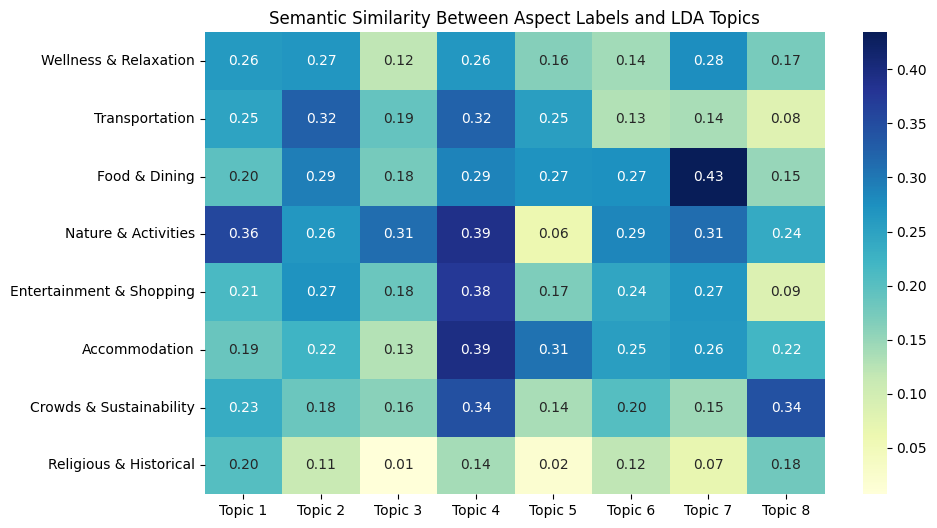


Best Matching Topic for Each Label:

'Wellness & Relaxation' → LDA Topic 7 (Top words: beach food nice evening clean women island good along massive high great swim sea bring)
'Transportation' → LDA Topic 2 (Top words: tour tea top day tuktuk part end two rock boat trip great hour us visited)
'Food & Dining' → LDA Topic 7 (Top words: beach food nice evening clean women island good along massive high great swim sea bring)
'Nature & Activities' → LDA Topic 4 (Top words: place beautiful time crowded tourist visit busy well around visited one people attraction bit view)
'Entertainment & Shopping' → LDA Topic 4 (Top words: place beautiful time crowded tourist visit busy well around visited one people attraction bit view)
'Accommodation' → LDA Topic 4 (Top words: place beautiful time crowded tourist visit busy well around visited one people attraction bit view)
'Crowds & Sustainability' → LDA Topic 4 (Top words: place beautiful time crowded tourist visit busy well around visited one people 

In [ ]:
# --- Import libraries ---
import pandas as pd
import numpy as np
from collections import Counter
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from google.colab import drive

# --- Mount Google Drive & NLTK setup ---
drive.mount('/content/drive')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# --- Load dataset ---
df = pd.read_csv("/content/drive/My Drive/fyp/final-model/labeled_reviews_filtered.csv")
print(f"Total number of rows: {len(df)}")

stop_words = set(stopwords.words("english"))

def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

df['tokens'] = df['review sentences'].map(preprocess)

# --- Create dictionary and corpus ---
id2word = corpora.Dictionary(df['tokens'])
id2word.filter_extremes(no_below=10, no_above=0.5)
corpus = [id2word.doc2bow(text) for text in df['tokens']]

# --- Train LDA model ---
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=8,
    random_state=42,
    passes=30,
    iterations=500,
    alpha='asymmetric',
    eta=0.01,
    per_word_topics=True
)

# --- Prepare topic keywords ---
topic_keywords = []
for i in range(lda_model.num_topics):
    top_words = lda_model.show_topic(i, topn=15)
    keyword_string = " ".join([word for word, _ in top_words])
    topic_keywords.append(keyword_string)

# --- Load transformer model ---
model = SentenceTransformer('all-MiniLM-L6-v2')

# Your predefined labels
aspect_labels = [
    "Wellness & Relaxation",
    "Transportation",
    "Food & Dining",
    "Nature & Activities",
    "Entertainment & Shopping",
    "Accommodation",
    "Crowds & Sustainability",
    "Religious & Historical"
]

# Compute embeddings
label_embeddings = model.encode(aspect_labels, convert_to_tensor=True)
topic_embeddings = model.encode(topic_keywords, convert_to_tensor=True)

# Compute cosine similarity
cosine_scores = util.cos_sim(label_embeddings, topic_embeddings).cpu().numpy()

# --- Map each label to its best topic ---
label_topic_map = {
    aspect_labels[i]: int(np.argmax(cosine_scores[i]))
    for i in range(len(aspect_labels))
}

# --- Count documents per dominant topic ---
dominant_topics = []
for doc_topics in lda_model.get_document_topics(corpus):
    if doc_topics:
        top_topic = max(doc_topics, key=lambda x: x[1])[0]
        dominant_topics.append(top_topic)
topic_counts = Counter(dominant_topics)

# --- Plot heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(cosine_scores, xticklabels=[f'Topic {i+1}' for i in range(8)], yticklabels=aspect_labels, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Semantic Similarity Between Aspect Labels and LDA Topics")
plt.show()

# --- Display mappings ---
print("\nBest Matching Topic for Each Label:\n")
for label, topic in label_topic_map.items():
    print(f"'{label}' → LDA Topic {topic + 1} (Top words: {topic_keywords[topic]})")

print("\nDocument Distribution Across Topics:\n")
for topic_id, count in topic_counts.items():
    print(f"Topic {topic_id + 1}: {count} documents")


In [ ]:
#Aspect EXtraction
!pip install scikit-multilearn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import ast
from collections import Counter
from tabulate import tabulate
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/fyp/final-preprocess/labeled_review_sentences_8_aspects_corrected.csv')
# Convert stringified list in 'aspects' column to actual Python lists
df['aspects'] = df['aspects'].apply(ast.literal_eval)

# Define all  8 aspect labels
all_aspects = [
    "Wellness & Relaxation",
    "Transportation",
    "Food & Dining",
    "Nature & Activities",
    "Entertainment & Shopping",
    "Accommodation",
    "Crowds & Sustainability",
    "Religious & Historical"
]

# Remove rows with only 'Uncategorized' or empty aspect lists
df = df[df['aspects'].apply(lambda x: any(a in all_aspects for a in x))].copy()
print(" Number of rows after removing 'Uncategorized':", len(df))

# Create one-hot encoded columns for each aspect
for asp in all_aspects:
    df.loc[:, asp] = df['aspects'].apply(lambda x: 1 if asp in x else 0)

# Count how many times each aspect appears
aspect_counter = Counter()
for aspect_list in df['aspects']:
    aspect_counter.update([a for a in aspect_list if a in all_aspects])

print("\n Total Count of Each Aspect:")
for aspect in all_aspects:
    print(f"- {aspect}: {aspect_counter[aspect]} times")

# Display first 10 rows with one-hot columns
print("\n First 10 rows:")
print(tabulate(df.head(10), headers='keys', tablefmt='github', showindex=False))

# Save the cleaned and one-hot encoded dataset
output_path = '/content/drive/My Drive/fyp/final-model/labeled_reviews_filtered_final.csv'
df.to_csv(output_path, index=False)
print(f"\n File saved to: {output_path}")


Mounted at /content/drive
 Number of rows after removing 'Uncategorized': 28921

 Total Count of Each Aspect:
- Wellness & Relaxation: 1814 times
- Transportation: 5415 times
- Food & Dining: 1946 times
- Nature & Activities: 13372 times
- Entertainment & Shopping: 2192 times
- Accommodation: 2554 times
- Crowds & Sustainability: 1468 times
- Religious & Historical: 6025 times

 First 10 rows:
| review sentences                                                                                              | aspects                                                                                       |   Wellness & Relaxation |   Transportation |   Food & Dining |   Nature & Activities |   Entertainment & Shopping |   Accommodation |   Crowds & Sustainability |   Religious & Historical |
|---------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from skmultilearn.model_selection import iterative_train_test_split

df = pd.read_csv('/content/drive/My Drive/fyp/final-model/labeled_reviews_filtered_final.csv')

# Define label columns
label_cols = [
    "Wellness & Relaxation",
    "Transportation",
    "Food & Dining",
    "Nature & Activities",
    "Entertainment & Shopping",
    "Accommodation",
    "Crowds & Sustainability",
    "Religious & Historical"
]

# Combine relevant columns
df_all = df[['review sentences'] + label_cols]


balanced_df = pd.DataFrame(columns=df_all.columns)
target_samples = 3000

for label in label_cols:
    subset = df_all[df_all[label] == 1]
    if len(subset) >= target_samples:
        sampled = subset.sample(n=target_samples, random_state=42)
    else:
        sampled = resample(subset, replace=True, n_samples=target_samples, random_state=42)
    balanced_df = pd.concat([balanced_df, sampled])


balanced_df = balanced_df.drop_duplicates(subset=['review sentences']).reset_index(drop=True)
# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Convert for split
X = balanced_df[['review sentences']].astype(str).values
y = balanced_df[label_cols].astype(int).values

# Train/test split with label distribution preserved
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.2)

# Create train/test DataFrames
train_df = pd.DataFrame(X_train, columns=['review sentences'])
for i, col in enumerate(label_cols):
    train_df[col] = y_train[:, i]

test_df = pd.DataFrame(X_test, columns=['review sentences'])
for i, col in enumerate(label_cols):
    test_df[col] = y_test[:, i]

# Save to Drive
train_df.to_csv('/content/drive/My Drive/fyp/final-model/train_balanced.csv', index=False)
test_df.to_csv('/content/drive/My Drive/fyp/final-model/test_balanced.csv', index=False)

# Report
print("Balanced train label counts:")
print(train_df[label_cols].sum())
print("\n Files saved to Google Drive!")


Balanced train label counts:
Wellness & Relaxation       1200
Transportation              2718
Food & Dining               1281
Nature & Activities         3893
Entertainment & Shopping    1358
Accommodation               1538
Crowds & Sustainability     1030
Religious & Historical      2646
dtype: int64

 Files saved to Google Drive!


In [ ]:
# Install required package
!pip install transformers scikit-learn --quiet

# Imports
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define label columns
label_cols = [
    "Wellness & Relaxation",
    "Transportation",
    "Food & Dining",
    "Nature & Activities",
    "Entertainment & Shopping",
    "Accommodation",
    "Crowds & Sustainability",
    "Religious & Historical"
]

# Load data
train_df = pd.read_csv("/content/drive/My Drive/fyp/final-model/train_balanced.csv")
test_df = pd.read_csv("/content/drive/My Drive/fyp/final-model/test_balanced.csv")

# Dataset class
class AspectDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            truncation=True,
            padding="max_length",
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.FloatTensor(label)
        }

# Tokenizer and device
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create datasets and loaders
train_dataset = AspectDataset(train_df['review sentences'].tolist(), train_df[label_cols].values, tokenizer)
test_dataset = AspectDataset(test_df['review sentences'].tolist(), test_df[label_cols].values, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Define the Model
class MultiLabelBERT(nn.Module):
    def __init__(self, num_labels):
        super(MultiLabelBERT, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.drop = nn.Dropout(0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        x = self.drop(outputs.pooler_output)
        return self.out(x)

# Initialize model
model = MultiLabelBERT(num_labels=len(label_cols)).to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Training loop
for epoch in range(5):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"✅ Epoch {epoch+1} | Loss: {avg_loss:.4f}")

# Evaluation
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].cpu().numpy()
        outputs = model(input_ids, attention_mask)
        preds = torch.sigmoid(outputs).cpu().numpy()
        preds = (preds > 0.5).astype(int)
        all_preds.extend(preds)
        all_labels.extend(labels)

print("\n✅ Classification Report:")
print(classification_report(all_labels, all_preds, target_names=label_cols))

# === SAVE MODEL + TOKENIZER ===
save_path = "/content/drive/My Drive/fyp/final-model"
os.makedirs(save_path, exist_ok=True)

# Save model weights
torch.save(model.state_dict(), f"{save_path}/multi_label_bert.pth")

# Save tokenizer
tokenizer.save_pretrained(save_path)

print(f"\n✅ Model saved to: {save_path}/multi_label_bert.pth")
print(f"✅ Tokenizer saved to: {save_path}/")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Epoch 1 | Loss: 0.2028
✅ Epoch 2 | Loss: 0.0294
✅ Epoch 3 | Loss: 0.0125
✅ Epoch 4 | Loss: 0.0082
✅ Epoch 5 | Loss: 0.0057

✅ Classification Report:
                          precision    recall  f1-score   support

   Wellness & Relaxation       1.00      0.97      0.98       300
          Transportation       1.00      1.00      1.00       680
           Food & Dining       0.99      1.00      0.99       320
     Nature & Activities       1.00      1.00      1.00       973
Entertainment & Shopping       1.00      0.99      1.00       340
           Accommodation       1.00      0.99      1.00       385
 Crowds & Sustainability       0.99      0.97      0.98       257
  Religious & Historical       1.00      1.00      1.00       661

               micro avg       1.00      0.99      1.00      3916
               macro avg       1.00      0.99      0.99   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



✅ Model saved to: /content/drive/My Drive/fyp/final-model/multi_label_bert.pth
✅ Tokenizer saved to: /content/drive/My Drive/fyp/final-model/


In [ ]:
def predict_aspects(sentence):
    model.eval()
    tokens = tokenizer.encode_plus(
        sentence,
        max_length=128,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    input_ids = tokens["input_ids"].to(device)
    attention_mask = tokens["attention_mask"].to(device)

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        probs = torch.sigmoid(output).cpu().numpy()[0]
        prediction = {label_cols[i]: int(probs[i] > 0.5) for i in range(len(label_cols))}
    return prediction

# Example prediction
print("\n✅ Prediction Example:")
print(predict_aspects("a beautiful place to visit relax calm down and recharge and i had a manicure. Also wisited temple on poya day"))



✅ Prediction Example:
{'Wellness & Relaxation': 1, 'Transportation': 0, 'Food & Dining': 0, 'Nature & Activities': 0, 'Entertainment & Shopping': 0, 'Accommodation': 0, 'Crowds & Sustainability': 0, 'Religious & Historical': 1}


In [ ]:
#sentiment data prep

In [ ]:
import pandas as pd
import ast
from collections import Counter
from tabulate import tabulate
from google.colab import drive
from tabulate import tabulate
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/fyp/final-preprocess/labeled_sentiment_by_aspect_final_data.csv')
print(df.head(10))
print("\n First 10 rows:")
print(tabulate(df.head(10), headers='keys', tablefmt='github', showindex=False))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                    review sentences  \
0  i had a manicure here and it really was profes...   
1          it is right on the ocean so very relaxing   
2        i will go back for massage and foot masssge   
3  you will find many things to do from the resta...   
4  the water was warm and the tide is calm and re...   
5  it is a perfect day to go to the beach and hav...   
6  great place to chill swim surf eat shop have s...   
7  good place for surf and a few stores to going ...   
8                  very good place for rest and surf   
9                   good clean beach with warm water   

                                             aspects Wellness & Relaxation  \
0                          ['Wellness & Relaxation']         very positive   
1                            ['Nature & Activities']               neutral   
2                   

In [ ]:
import pandas as pd
import ast
from collections import defaultdict

# Load original sentence-level DataFrame
df = pd.read_csv("/content/drive/My Drive/fyp/final-preprocess/labeled_sentiment_by_aspect_final_data.csv")

# Defined aspect columns
label_cols = [
    "Wellness & Relaxation",
    "Transportation",
    "Food & Dining",
    "Nature & Activities",
    "Entertainment & Shopping",
    "Accommodation",
    "Crowds & Sustainability",
    "Religious & Historical"
]

# Convert 'aspects' from string to list
df['aspects'] = df['aspects'].apply(ast.literal_eval)

# Step 1: Create list of (sentence, aspect, sentiment_5class) rows
aspect_rows = []
for idx, row in df.iterrows():
    sentence = row['review sentences']
    aspects = row['aspects']
    for aspect in aspects:
        if aspect in label_cols:
            sentiment = row[aspect]
            aspect_rows.append({
                "sentence": sentence,
                "aspect": aspect,
                "sentiment_5class": sentiment
            })

df_aspect = pd.DataFrame(aspect_rows)

# Step 2: Group by sentence
grouped = df_aspect.groupby("sentence")

# Map sentence -> all rows
sentence_to_rows = {s: g for s, g in grouped}

# Step 3: Track class counts
from collections import Counter

class_counts = Counter(df_aspect['sentiment_5class'])
min_class = min(class_counts, key=class_counts.get)
target_size = class_counts[min_class]

# Step 4: Build new balanced dataset
balanced_rows = []
seen_sentences = set()
class_tally = defaultdict(int)

# Shuffle sentences to randomize
import random
sentence_list = list(sentence_to_rows.items())
random.seed(42)
random.shuffle(sentence_list)

for sentence, group in sentence_list:
    sentiment_classes = group["sentiment_5class"].unique()

    # Check if adding this sentence would overflow any class
    if all(class_tally[sent] < target_size for sent in sentiment_classes):
        for sent in sentiment_classes:
            class_tally[sent] += (group["sentiment_5class"] == sent).sum()
        balanced_rows.append(group)
        seen_sentences.add(sentence)

    if all(class_tally[s] >= target_size for s in class_counts):
        break

# Combine all kept groups into final DataFrame
df_balanced = pd.concat(balanced_rows).reset_index(drop=True)
print(df_balanced.head(10))
# Save to CSV
df_balanced.to_csv("/content/drive/My Drive/fyp/final-preprocess/labeled_sentiment_aspect_based_sentiment_balance.csv", index=False)


                                            sentence                  aspect  \
0  do not go to the very top where the lipton is ...          Transportation   
1  do not go to the very top where the lipton is ...           Accommodation   
2  nice sandy beach with shallow sea for quite a ...     Nature & Activities   
3  in the morning it is very nice to surf on that...     Nature & Activities   
4                         good beach well maintained     Nature & Activities   
5  this visit was a truly memorable thing to do a...     Nature & Activities   
6  around the coast 200 metres of large rocks to ...     Nature & Activities   
7  however i would not make a specific visit to t...     Nature & Activities   
8  the mandatory guide they send along basically ...     Nature & Activities   
9  the koneswaram temple is one of most holy hind...  Religious & Historical   

  sentiment_5class  
0    very negative  
1    very negative  
2          neutral  
3    very positive  
4    very posi

In [ ]:
#Sentiment by deberta

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/fyp/final-preprocess/labeled_sentiment_aspect_based_sentiment_balance.csv")
label_map = {'very negative': 0, 'negative': 1, 'neutral': 2, 'positive': 3, 'very positive': 4}
df['label'] = df['sentiment_5class'].map(label_map)

train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["label"], random_state=42)


Mounted at /content/drive


In [ ]:
class ABSADataset(Dataset):
    def __init__(self, df, tokenizer):
        self.sentences = df["sentence"].reset_index(drop=True)
        self.aspects = df["aspect"].reset_index(drop=True)
        self.labels = df["label"].reset_index(drop=True)
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        aspect = self.aspects[idx]
        text = f"[ASPECT] {aspect} [SENTENCE] {sentence}"
        encoded = self.tokenizer(text, padding="max_length", truncation=True, max_length=128, return_tensors="pt")
        return {
            "input_ids": encoded["input_ids"].squeeze(),
            "attention_mask": encoded["attention_mask"].squeeze(),
            "labels": torch.tensor(self.labels[idx]),
            "sentence": sentence,
            "aspect": aspect
        }



In [ ]:
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_dataset = ABSADataset(train_df, tokenizer)
val_dataset = ABSADataset(val_df, tokenizer)
test_dataset = ABSADataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
class SimpleDebertaClassifier(nn.Module):
    def __init__(self, model_name="microsoft/deberta-v3-base", num_labels=5):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)
        self.classifier = nn.Linear(self.encoder.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0]  # CLS token
        logits = self.classifier(cls_output)
        return logits


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleDebertaClassifier()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

for epoch in range(8):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {total_loss / len(train_loader):.4f}")


100%|██████████| 908/908 [06:41<00:00,  2.26it/s]


Epoch 1 - Loss: 0.8059


100%|██████████| 908/908 [06:39<00:00,  2.27it/s]


Epoch 2 - Loss: 0.4580


100%|██████████| 908/908 [06:39<00:00,  2.27it/s]


Epoch 3 - Loss: 0.2977


100%|██████████| 908/908 [06:39<00:00,  2.27it/s]


Epoch 4 - Loss: 0.1920


100%|██████████| 908/908 [06:39<00:00,  2.28it/s]


Epoch 5 - Loss: 0.1218


100%|██████████| 908/908 [06:39<00:00,  2.28it/s]


Epoch 6 - Loss: 0.0831


100%|██████████| 908/908 [06:39<00:00,  2.27it/s]


Epoch 7 - Loss: 0.0563


100%|██████████| 908/908 [06:39<00:00,  2.27it/s]

Epoch 8 - Loss: 0.0460


In [ ]:
import os

save_path = "/content/drive/My Drive/fyp/final-model/baseline_deberta"
os.makedirs(save_path, exist_ok=True)

torch.save(model.state_dict(), os.path.join(save_path, "model.pt"))
tokenizer.save_pretrained(save_path)


('/content/drive/My Drive/fyp/final-model/baseline_deberta/tokenizer_config.json',
 '/content/drive/My Drive/fyp/final-model/baseline_deberta/special_tokens_map.json',
 '/content/drive/My Drive/fyp/final-model/baseline_deberta/spm.model',
 '/content/drive/My Drive/fyp/final-model/baseline_deberta/added_tokens.json',
 '/content/drive/My Drive/fyp/final-model/baseline_deberta/tokenizer.json')

In [ ]:
def evaluate(loader, label_names, show_incorrect=False):
    model.eval()
    all_preds, all_labels = [], []
    incorrect_samples = []

    with torch.no_grad():
        for batch in loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            logits = model(input_ids, attention_mask)
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            if show_incorrect:
                sentences = batch["sentence"]
                aspects = batch["aspect"]
                for i in range(len(labels)):
                    true_label = labels[i].item()
                    pred_label = preds[i].item()
                    if true_label != pred_label:
                        incorrect_samples.append({
                            "sentence": sentences[i],
                            "aspect": aspects[i],
                            "true": label_names[true_label],
                            "pred": label_names[pred_label]
                        })

    print("Accuracy:", accuracy_score(all_labels, all_preds))
    print("F1 Score (Macro):", f1_score(all_labels, all_preds, average="macro"))
    print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=label_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    if show_incorrect:
        print("\nIncorrect Predictions:")
        for i, sample in enumerate(incorrect_samples):
            print(f"{i+1}. Aspect: {sample['aspect']}\n   Sentence: {sample['sentence']}")
            print(f"   True: {sample['true']} | Predicted: {sample['pred']}\n")


Validation Results:
Accuracy: 0.8694214876033057
F1 Score (Macro): 0.8669840628132581

Classification Report:
                precision    recall  f1-score   support

very negative       0.96      0.82      0.88       287
     negative       0.85      0.93      0.89       415
      neutral       0.77      0.85      0.81       287
     positive       0.87      0.81      0.84       414
very positive       0.92      0.91      0.92       412

     accuracy                           0.87      1815
    macro avg       0.87      0.87      0.87      1815
 weighted avg       0.87      0.87      0.87      1815



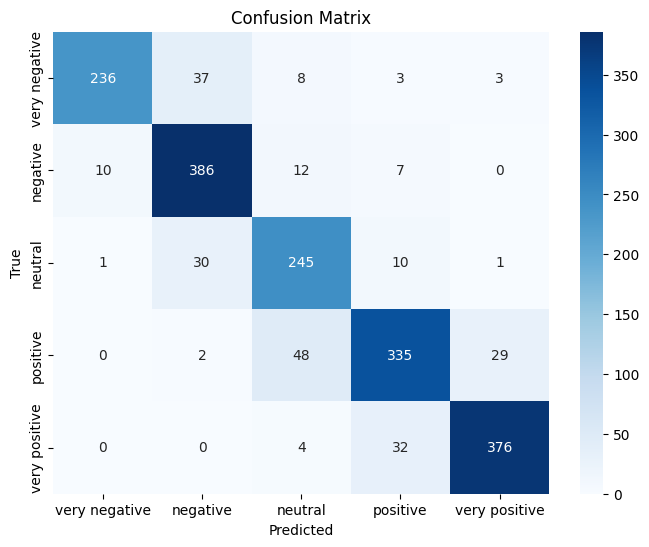

Test Results:
Accuracy: 0.8699724517906336
F1 Score (Macro): 0.8676014597174664

Classification Report:
                precision    recall  f1-score   support

very negative       0.97      0.82      0.89       287
     negative       0.85      0.94      0.90       415
      neutral       0.78      0.85      0.81       288
     positive       0.87      0.82      0.85       414
very positive       0.90      0.90      0.90       411

     accuracy                           0.87      1815
    macro avg       0.87      0.87      0.87      1815
 weighted avg       0.87      0.87      0.87      1815



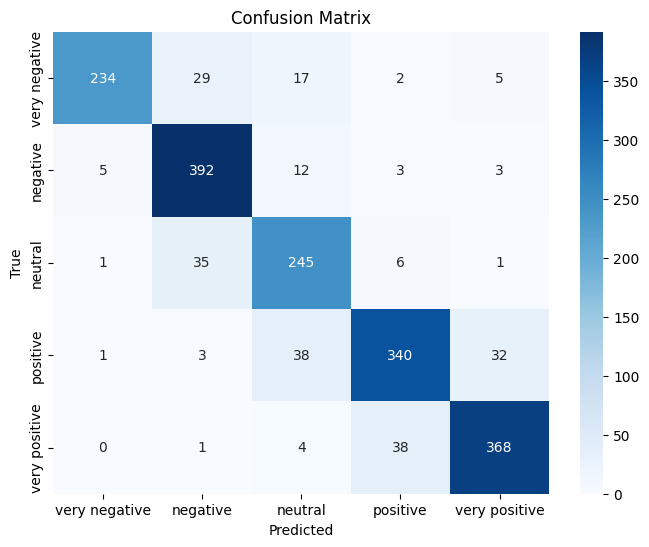


Incorrect Predictions:
1. Aspect: Accommodation
   Sentence: surprisingly they have well maintained washroom facilities inside the park too
   True: very positive | Predicted: positive

2. Aspect: Nature & Activities
   Sentence: i imagine this is a lovely beach during the summer season but i do feel the locals and rubbish piles will always be an issue
   True: very positive | Predicted: positive

3. Aspect: Religious & Historical
   Sentence: the pillars make the temple looks stunning
   True: positive | Predicted: very positive

4. Aspect: Nature & Activities
   Sentence: it was much less busy than the parks we visited further south and denser forest which was nice
   True: positive | Predicted: neutral

5. Aspect: Nature & Activities
   Sentence: it is important to have a good guide who can spot all the animals and show them
   True: positive | Predicted: very positive

6. Aspect: Nature & Activities
   Sentence: it went on for quite awhile and people with young children were unabl

In [ ]:
label_names = ['very negative', 'negative', 'neutral', 'positive', 'very positive']

print("Validation Results:")
evaluate(val_loader, label_names)

print("Test Results:")
evaluate(test_loader, label_names, show_incorrect=True)


In [ ]:
#sentiment by Tri head DeBERTa

Imports necessary libraries

In [4]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from tqdm import tqdm


Defines word lists (intensifiers, negators, positive/negative words) and their corresponding tag map to be used for token-level classification.

In [3]:
import json
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/fyp/final-preprocess/tourism_lexicon.json') as f:
    lexicon = json.load(f)



intensifiers = set(w.lower() for w in lexicon["intensifiers"])
negators = set(w.lower() for w in lexicon["negators"])
positive_words = set(w.lower() for w in lexicon["positive"])
negative_words = set(w.lower() for w in lexicon["negative"])


tag_map = {"O": 0, "INTENSIFIER": 1, "NEGATOR": 2, "POSITIVE": 3, "NEGATIVE": 4}



Mounted at /content/drive


Loads DeBERTa tokenizer and adds special tokens [ASPECT] and [SENTENCE] to mark key parts of the input for better aspect-based processing.

In [5]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-base")
tokenizer.add_special_tokens({"additional_special_tokens": ["[ASPECT]", "[SENTENCE]"]})


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


2

Creates a custom PyTorch Dataset that formats input as "[ASPECT] X [SENTENCE] Y", tokenizes it, and assigns tags to each token using the predefined word lists.

In [6]:
class MultiTaskABSADataset(Dataset):
    def __init__(self, df, tokenizer):
        self.texts = df["sentence"].reset_index(drop=True)
        self.aspects = df["aspect"].reset_index(drop=True)
        self.labels = df["label"].reset_index(drop=True)
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        sentence = self.texts[idx]
        aspect = self.aspects[idx]
        label = self.labels[idx]
        input_text = f"[ASPECT] {aspect} [SENTENCE] {sentence}"

        encoded = self.tokenizer(
            input_text,
            max_length=128,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        input_ids = encoded["input_ids"].squeeze()
        attention_mask = encoded["attention_mask"].squeeze()
        tokens = self.tokenizer.convert_ids_to_tokens(input_ids)

        tags = []
        for token in tokens:
            word = token.lstrip("▁Ġ").lower()
            if word in intensifiers:
                tags.append(tag_map["INTENSIFIER"])
            elif word in negators:
                tags.append(tag_map["NEGATOR"])
            elif word in positive_words:
                tags.append(tag_map["POSITIVE"])
            elif word in negative_words:
                tags.append(tag_map["NEGATIVE"])
            else:
                tags.append(tag_map["O"])
        tags = tags[:len(input_ids)]
        tags += [tag_map["O"]] * (len(input_ids) - len(tags))

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": torch.tensor(label),
            "tag_labels": torch.tensor(tags)
        }


Defines the TriHeadDeberta model with three heads (content, aspect, modifier) and combines them using learnable attention weights; performs sentence-level and token-level classification in a multi-task setup.

In [ ]:
#Attention weights are defined as a learnable parameter:

In [7]:
class TriHeadDeberta(nn.Module):
    def __init__(self, model_name="microsoft/deberta-v3-base", num_labels=5, num_token_tags=5):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)
        hidden_size = self.encoder.config.hidden_size

        self.content_head = nn.Linear(hidden_size, hidden_size)
        self.aspect_head = nn.Linear(hidden_size, hidden_size)
        self.modifier_head = nn.Linear(hidden_size, hidden_size)

        #model starts with random weights for the 3 heads:
        self.attention_weights = nn.Parameter(torch.randn(3))

        self.classifier = nn.Linear(hidden_size, num_labels)
        self.token_classifier = nn.Linear(hidden_size, num_token_tags)

        self.loss_sentiment = nn.CrossEntropyLoss()
        self.loss_token = nn.CrossEntropyLoss(ignore_index=-100)
        self.aspect_token_id = tokenizer.convert_tokens_to_ids("[ASPECT]")

    def extract_aspect_embedding(self, x, input_ids):
        aspect_mask = (input_ids == self.aspect_token_id).unsqueeze(-1)
        aspect_embeddings = (x * aspect_mask).sum(dim=1)
        aspect_counts = aspect_mask.sum(dim=1).clamp(min=1)
        return aspect_embeddings / aspect_counts

    def forward(self, input_ids, attention_mask, labels=None, tag_labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        x = outputs.last_hidden_state

        h_content = self.content_head(x)
        h_modifier = self.modifier_head(x)
        aspect_repr = self.extract_aspect_embedding(x, input_ids)
        h_aspect = self.aspect_head(x + aspect_repr.unsqueeze(1))
        #During training, the model learns how important each head is for making accurate predictions. These raw weights are passed through softmax to normalize them:
        weights = torch.softmax(self.attention_weights, dim=0)
        #etween 0 and 1 and Sum to 1
        h_final = weights[0]*h_content + weights[1]*h_aspect + weights[2]*h_modifier

        cls_output = h_final[:, 0]
        sentiment_logits = self.classifier(cls_output)
        token_logits = self.token_classifier(h_final)

        loss = None
        if labels is not None and tag_labels is not None:
            loss_sentiment = self.loss_sentiment(sentiment_logits, labels)
            loss_token = self.loss_token(token_logits.view(-1, token_logits.size(-1)), tag_labels.view(-1))
            aspect_focus_penalty = (1.0 - weights[1]) ** 2
            loss = loss_sentiment + 1.0 * loss_token + 0.1 * aspect_focus_penalty

        return {
            "loss": loss,
            "logits": sentiment_logits,
            "token_logits": token_logits,
            "attention_weights": weights.detach().cpu().numpy()
        }


Sets up the model on GPU/CPU, resizes tokenizer embeddings to include new special tokens, and initializes the optimizer.

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TriHeadDeberta()
model.encoder.resize_token_embeddings(len(tokenizer))
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)


pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Loads labeled aspect-based sentiment dataset from Google Drive, maps sentiment labels to integers, and splits the dataset into train, validation, and test sets.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/fyp/final-preprocess/labeled_sentiment_aspect_based_sentiment_balance.csv")
print(df.head(20))
print("Number of rows:", len(df))
label_map = {'very negative': 0, 'negative': 1, 'neutral': 2, 'positive': 3, 'very positive': 4}
df['label'] = df['sentiment_5class'].map(label_map)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                             sentence                  aspect  \
0   do not go to the very top where the lipton is ...          Transportation   
1   do not go to the very top where the lipton is ...           Accommodation   
2   nice sandy beach with shallow sea for quite a ...     Nature & Activities   
3   in the morning it is very nice to surf on that...     Nature & Activities   
4                          good beach well maintained     Nature & Activities   
5   this visit was a truly memorable thing to do a...     Nature & Activities   
6   around the coast 200 metres of large rocks to ...     Nature & Activities   
7   however i would not make a specific visit to t...     Nature & Activities   
8   the mandatory guide they send along basically ...     Nature & Activities   
9   the koneswaram temple is one of most holy hind...  Religi

Converts the dataframes into custom datasets and wraps them in PyTorch DataLoaders for training and evaluation.

In [10]:
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["label"], random_state=42)

train_dataset = MultiTaskABSADataset(train_df, tokenizer)
val_dataset = MultiTaskABSADataset(val_df, tokenizer)
test_dataset = MultiTaskABSADataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


Runs training loop for 8 epochs, optimizing both sentence-level and token-level losses, using batches from the training DataLoader

In [ ]:
from torch.optim import AdamW
from tqdm import tqdm


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

for epoch in range(8):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs["loss"]
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f"Epoch {epoch+1} - Loss: {total_loss / len(train_loader):.4f}")



100%|██████████| 908/908 [06:48<00:00,  2.22it/s]


Epoch 1 - Loss: 0.9655


100%|██████████| 908/908 [06:46<00:00,  2.23it/s]


Epoch 2 - Loss: 0.5333


100%|██████████| 908/908 [06:45<00:00,  2.24it/s]


Epoch 3 - Loss: 0.4035


100%|██████████| 908/908 [06:45<00:00,  2.24it/s]


Epoch 4 - Loss: 0.3118


100%|██████████| 908/908 [06:45<00:00,  2.24it/s]


Epoch 5 - Loss: 0.2400


100%|██████████| 908/908 [06:45<00:00,  2.24it/s]


Epoch 6 - Loss: 0.1834


100%|██████████| 908/908 [06:45<00:00,  2.24it/s]


Epoch 7 - Loss: 0.1474


100%|██████████| 908/908 [06:46<00:00,  2.23it/s]

Epoch 8 - Loss: 0.1263


Defines an evaluation function that computes accuracy, F1 score, and a detailed classification report for a given DataLoader.

In [ ]:
def evaluate(loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs["logits"], dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print("Accuracy:", accuracy_score(all_labels, all_preds))
    print("F1 Score:", f1_score(all_labels, all_preds, average="macro"))
    print(classification_report(all_labels, all_preds))

print("Validation Results:")
evaluate(val_loader)
print("Test Results:")
evaluate(test_loader)


Validation Results:
Accuracy: 0.9046831955922865
F1 Score: 0.9037157638771685
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       287
           1       0.90      0.95      0.92       415
           2       0.92      0.84      0.88       287
           3       0.86      0.89      0.88       414
           4       0.91      0.93      0.92       412

    accuracy                           0.90      1815
   macro avg       0.91      0.90      0.90      1815
weighted avg       0.91      0.90      0.90      1815

Test Results:
Accuracy: 0.9085399449035813
F1 Score: 0.9075708174482265
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       287
           1       0.89      0.94      0.92       415
           2       0.92      0.84      0.88       288
           3       0.87      0.91      0.89       414
           4       0.92      0.94      0.93       411

    accuracy                       

In [ ]:
def visualize_token_tags(text, aspect):
    model.eval()
    input_text = f"[ASPECT] {aspect} [SENTENCE] {text}"
    encoded = tokenizer(
        input_text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=128
    )
    input_ids = encoded["input_ids"].to(device)
    attention_mask = encoded["attention_mask"].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        token_logits = outputs["token_logits"]
        predictions = torch.argmax(token_logits, dim=-1).squeeze().cpu().numpy()
        tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze())

    inv_tag_map = {v: k for k, v in tag_map.items()}
    print(f"Input: {text}\nAspect: {aspect}\nTagged Tokens:")
    for token, tag in zip(tokens, predictions):
        if tag != tag_map["O"]:
            print(f"{token:15} → {inv_tag_map[tag]}")


In [ ]:
import os
save_path = "/content/drive/My Drive/fyp/final-model/tri_head_saved_model"
os.makedirs(save_path, exist_ok=True)
torch.save(model.state_dict(), os.path.join(save_path, "model.pt"))
tokenizer.save_pretrained(save_path)
print(f"Model saved to {save_path}")


Model saved to /content/drive/My Drive/fyp/final-model/tri_head_saved_model


Implements a prediction function that returns sentiment for a specific sentence-aspect pair, demonstrating aspect-sensitive inference.



In [ ]:
def predict_sentiment(text, aspect):
    model.eval()
    input_text = f"[ASPECT] {aspect} [SENTENCE] {text}"
    encoded = tokenizer(
        input_text,
        return_tensors="pt",
        padding="max_length",
        truncation=True,
        max_length=128
    )
    input_ids = encoded["input_ids"].to(device)
    attention_mask = encoded["attention_mask"].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs["logits"]
        pred = torch.argmax(logits, dim=1).item()

    label_map_inv = {0: "very negative", 1: "negative", 2: "neutral", 3: "positive", 4: "very positive"}
    print(f"Sentence: {text}\nAspect: {aspect}\nPredicted Sentiment: {label_map_inv[pred]}")


In [ ]:
predict_sentiment(
    "The hotel room was bad but  the food was delicious.",
    "Accommodation"
)

predict_sentiment(
    "The hotel room was bad but  the food was delicious.",
    "Food & Dining"
)


predict_sentiment(
    "The temple was very  calm .",
    "Religious & Historical"

)




Sentence: The hotel room was bad but  the food was delicious.
Aspect: Accommodation
Predicted Sentiment: negative
Sentence: The hotel room was bad but  the food was delicious.
Aspect: Food & Dining
Predicted Sentiment: very positive
Sentence: The temple was very  calm .
Aspect: Religious & Historical
Predicted Sentiment: very positive


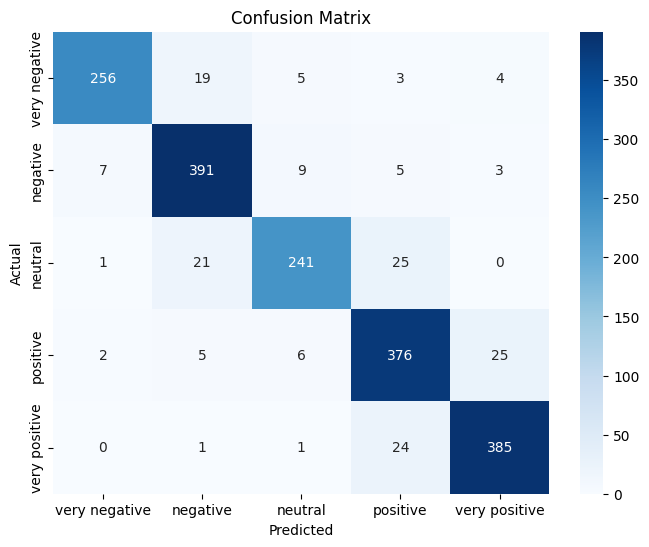

In [ ]:
def plot_confusion_matrix(loader, class_names):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs["logits"], dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

class_names = ["very negative", "negative", "neutral", "positive", "very positive"]
plot_confusion_matrix(test_loader, class_names)


Load Model after saving and View Attention Weights

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel


In [ ]:
save_path = "/content/drive/My Drive/fyp/final-model/tri_head_saved_model"
tokenizer = AutoTokenizer.from_pretrained(save_path)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class TriHeadDeberta(nn.Module):
    def __init__(self, model_name="microsoft/deberta-v3-base", num_labels=5, num_token_tags=5):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)
        hidden_size = self.encoder.config.hidden_size

        self.content_head = nn.Linear(hidden_size, hidden_size)
        self.aspect_head = nn.Linear(hidden_size, hidden_size)
        self.modifier_head = nn.Linear(hidden_size, hidden_size)

        self.attention_weights = nn.Parameter(torch.randn(3))

        self.classifier = nn.Linear(hidden_size, num_labels)
        self.token_classifier = nn.Linear(hidden_size, num_token_tags)

        self.loss_sentiment = nn.CrossEntropyLoss()
        self.loss_token = nn.CrossEntropyLoss(ignore_index=-100)
        self.aspect_token_id = tokenizer.convert_tokens_to_ids("[ASPECT]")

    def extract_aspect_embedding(self, x, input_ids):
        aspect_mask = (input_ids == self.aspect_token_id).unsqueeze(-1)
        aspect_embeddings = (x * aspect_mask).sum(dim=1)
        aspect_counts = aspect_mask.sum(dim=1).clamp(min=1)
        return aspect_embeddings / aspect_counts

    def forward(self, input_ids, attention_mask, labels=None, tag_labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        x = outputs.last_hidden_state

        h_content = self.content_head(x)
        h_modifier = self.modifier_head(x)
        aspect_repr = self.extract_aspect_embedding(x, input_ids)
        h_aspect = self.aspect_head(x + aspect_repr.unsqueeze(1))

        weights = torch.softmax(self.attention_weights, dim=0)
        h_final = weights[0]*h_content + weights[1]*h_aspect + weights[2]*h_modifier

        cls_output = h_final[:, 0]
        sentiment_logits = self.classifier(cls_output)
        token_logits = self.token_classifier(h_final)

        loss = None
        if labels is not None and tag_labels is not None:
            loss_sentiment = self.loss_sentiment(sentiment_logits, labels)
            loss_token = self.loss_token(token_logits.view(-1, token_logits.size(-1)), tag_labels.view(-1))
            aspect_focus_penalty = (1.0 - weights[1]) ** 2
            loss = loss_sentiment + 1.0 * loss_token + 0.1 * aspect_focus_penalty

        return {
            "loss": loss,
            "logits": sentiment_logits,
            "token_logits": token_logits,
            "attention_weights": weights.detach().cpu().numpy()
        }

model = TriHeadDeberta()
model.encoder.resize_token_embeddings(len(tokenizer))
model.load_state_dict(torch.load(f"{save_path}/model.pt", map_location=device))
model.to(device)
model.eval()


TriHeadDeberta(
  (encoder): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128003, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-

In [ ]:
# Example input for testing
text =   "The hotel room was bad but  the food was very delicious.",
aspect = "Food & Dining"


# Prepare input
input_text = f"[ASPECT] {aspect} [SENTENCE] {text}"
encoded = tokenizer(
    input_text,
    return_tensors="pt",
    truncation=True,
    padding="max_length",
    max_length=128
)

input_ids = encoded["input_ids"].to(device)
attention_mask = encoded["attention_mask"].to(device)

# Run the model
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs["logits"]
    pred = torch.argmax(logits, dim=1).item()
    weights = outputs["attention_weights"]

# Map prediction to label
label_map_inv = {0: "very negative", 1: "negative", 2: "neutral", 3: "positive", 4: "very positive"}

# Output results
print(f"\n Sentence: {text}")
print(f" Aspect: {aspect}")
print(f" Predicted Sentiment: {label_map_inv[pred]}")
print(f" Attention Weights (Content, Aspect, Modifier): {weights.round(4)}")



 Sentence: ('The hotel room was bad but  the food was very delicious.',)
 Aspect: Food & Dining
 Predicted Sentiment: very positive
 Attention Weights (Content, Aspect, Modifier): [0.2749 0.2784 0.4467]


In [ ]:
#Unsafe review prediction
!pip install pandas numpy scikit-learn matplotlib tensorflow



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1: Loss = 0.3403
Epoch 2: Loss = 0.0004
Epoch 3: Loss = 0.0001
Epoch 4: Loss = 0.0001
Epoch 5: Loss = 0.0000

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

        Safe       1.00      1.00      1.00      1000
      Unsafe       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



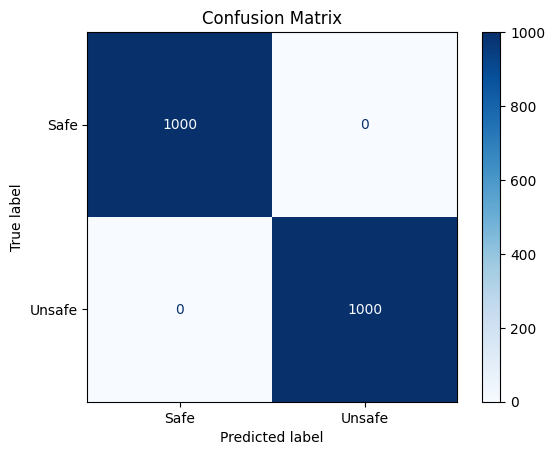

Model and tokenizer saved.

Review: We were harassed multiple times walking back to the hotel at night.
Predicted Label: Unsafe (Confidence: 100.00%)


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pickle
from google.colab import drive
drive.mount('/content/drive')

# ===================== Load and Balance Data =====================
df = pd.read_csv("/content/drive/My Drive/fyp/safety/safety-reviews.csv")
df.dropna(subset=['review sentences'], inplace=True)

majority = df[df['safety_label'] == 0]
minority = df[df['safety_label'] == 1]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
df_balanced = pd.concat([majority, minority_upsampled])

# ===================== Tokenization =====================
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_balanced['review sentences'])
sequences = tokenizer.texts_to_sequences(df_balanced['review sentences'])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

X = np.array(padded)
y = np.array(df_balanced['safety_label'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ===================== Dataset =====================
class ReviewDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.LongTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = ReviewDataset(X_train, y_train)
test_dataset = ReviewDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# ===================== Model =====================
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(hidden_dim * 2, 64)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        x = self.global_pool(lstm_out.permute(0, 2, 1)).squeeze(-1)
        x = self.dropout(torch.relu(self.fc1(x)))
        return self.sigmoid(self.fc2(x)).squeeze()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier(vocab_size=10000, embedding_dim=64, hidden_dim=64, output_dim=1).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ===================== Training =====================
for epoch in range(5):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {total_loss/len(train_loader):.4f}")

# ===================== Evaluation =====================
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X).cpu().numpy()
        preds = (outputs > 0.5).astype(int)
        all_preds.extend(preds)
        all_labels.extend(batch_y.numpy())

print(f"\nAccuracy: {accuracy_score(all_labels, all_preds)*100:.2f}%")
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=["Safe", "Unsafe"]))

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Safe", "Unsafe"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ===================== Save Model and Tokenizer =====================
torch.save(model.state_dict(), "/content/drive/My Drive/fyp/safety/pytorch_safety_model.pt")
with open("/content/drive/My Drive/fyp/safety/tokenizer.pkl", 'wb') as f:
    pickle.dump(tokenizer, f)

print("Model and tokenizer saved.")

# ===================== Prediction Function =====================
def predict_safety(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=100, padding='post')
    input_tensor = torch.LongTensor(padded_seq).to(device)
    model.eval()
    with torch.no_grad():
        prob = model(input_tensor).cpu().item()
    label = "Unsafe" if prob >= 0.5 else "Safe"
    confidence = prob if prob >= 0.5 else 1 - prob
    print(f"\nReview: {text}")
    print(f"Predicted Label: {label} (Confidence: {confidence*100:.2f}%)")


# ===================== Example =====================
predict_safety("We were harassed multiple times walking back to the hotel at night.")


In [ ]:
# ===================== Load Model and Tokenizer =====================
import pickle
import torch
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define model architecture again (same as before)
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(hidden_dim * 2, 64)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        x = self.global_pool(lstm_out.permute(0, 2, 1)).squeeze(-1)
        x = self.dropout(torch.relu(self.fc1(x)))
        return self.sigmoid(self.fc2(x)).squeeze()

# Load tokenizer
with open("/content/drive/My Drive/fyp/safety/tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier(vocab_size=10000, embedding_dim=64, hidden_dim=64, output_dim=1).to(device)
model.load_state_dict(torch.load("/content/drive/My Drive/fyp/safety/pytorch_safety_model.pt", map_location=device))
model.eval()

def predict_safety(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=100, padding='post')
    input_tensor = torch.LongTensor(padded_seq).to(device)
    model.eval()
    with torch.no_grad():
        prob = model(input_tensor).cpu().item()
    label = "Unsafe" if prob >= 0.5 else "Safe"
    confidence = prob if prob >= 0.5 else 1 - prob
    print(f"\nReview: {text}")
    print(f"Predicted Label: {label} (Confidence: {confidence*100:.2f}%)")
predict_safety("We were harassed multiple times walking back to the hotel at night.")



Review: We were harassed multiple times walking back to the hotel at night.
Predicted Label: Unsafe (Confidence: 100.00%)


In [ ]:
#sentiment prediction rule base

In [ ]:
import spacy
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd

nltk.download('vader_lexicon')
nltk.download('punkt')

nlp = spacy.load("en_core_web_sm")
sia = SentimentIntensityAnalyzer()

NEGATIONS = {'not', "n't", 'never', 'no', 'none', 'without', 'lack of', 'hardly'}
INTENSIFIERS = {
    'very': 1.5, 'extremely': 1.8, 'really': 1.3, 'absolutely': 1.7,
    'highly': 1.4, 'so': 1.3, 'too': 1.2, 'somewhat': 0.7,
    'slightly': 0.6, 'barely': 0.5, 'a bit': 0.6
}

# Given aspect categories and some example terms per aspect:
ASPECT_TERMS = {
    "Wellness & Relaxation": ['relax', 'calm', 'rest', 'spa', 'quiet', 'comfortable'],
    "Transportation": ['transport', 'bus', 'taxi', 'car', 'train', 'station', 'traffic'],
    "Food & Dining": ['food', 'meal', 'dinner', 'restaurant', 'taste', 'dish', 'cuisine', 'service'],
    "Nature & Activities": ['nature', 'hike', 'park', 'beach', 'forest', 'wildlife', 'trail'],
    "Entertainment & Shopping": ['shopping', 'market', 'mall', 'movie', 'show', 'fun'],
    "Accommodation": ['hotel', 'room', 'stay', 'bed', 'clean', 'staff'],
    "Crowds & Sustainability": ['crowd', 'pollution', 'waste', 'overcrowded', 'environment']
}

def find_terms_in_text(text, terms):
    """
    Return set of terms found in the text (case insensitive, exact match on word boundaries).
    """
    text_lower = text.lower()
    found = set()
    for term in terms:
        if f" {term} " in f" {text_lower} ":
            found.add(term)
    return found

def sentiment_for_term(text, term):
    doc = nlp(text)
    sents = [sent.text for sent in doc.sents if term in sent.text.lower()]
    if not sents:
        return 0.0
    scores = []
    for sent in sents:
        sent_doc = nlp(sent.lower())
        base_score = sia.polarity_scores(sent)['compound']
        negation = any(token.text in NEGATIONS and
                       any(t.text == term for t in token.subtree)
                       for token in sent_doc)
        intensifier = 1.0
        for token in sent_doc:
            if token.text in INTENSIFIERS:
                if any(t.text == term for t in token.head.children):
                    intensifier = min(2.0, intensifier * INTENSIFIERS[token.text])

        adjusted = -base_score * intensifier if negation else base_score * intensifier
        scores.append(adjusted)
    return np.mean(scores)

def analyze_aspect_sentiment(text):
    results = []
    for aspect, terms in ASPECT_TERMS.items():
        found_terms = find_terms_in_text(text, terms)
        if not found_terms:
            # No related terms found for this aspect → neutral
            results.append({'aspect': aspect, 'sentiment': 0.0, 'polarity': 3, 'label': 'Neutral'})
            continue
        sentiments = [sentiment_for_term(text, term) for term in found_terms]
        avg_sent = np.mean(sentiments)
        if avg_sent > 0.6:
            polarity = 5
            label = "Very Positive"
        elif avg_sent > 0.2:
            polarity = 4
            label = "Positive"
        elif avg_sent >= -0.2:
            polarity = 3
            label = "Neutral"
        elif avg_sent > -0.6:
            polarity = 2
            label = "Negative"
        else:
            polarity = 1
            label = "Very Negative"
        results.append({'aspect': aspect, 'sentiment': round(avg_sent,3), 'polarity': polarity, 'label': label})

    return pd.DataFrame(results)

# Example usage
if __name__ == "__main__":
    example_text = ("The hotel room was clean and very comfortable. The food was absolutely delicious, "
                    "but transportation was slow and crowded. The beach was nice, but too crowded.")
    df = analyze_aspect_sentiment(example_text)
    print(df[['aspect', 'sentiment', 'polarity', 'label']])


KeyboardInterrupt: 